In [17]:

import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np
%matplotlib inline

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [29]:
def elbow(k, X):
    distortions = []
    for i in xrange(1, k+1):
        km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter= 300, random_state=0)
        km.fit(X)
        #distortions.append(km.inertia_)
        distortions.append(sum(np.min(cdist(X, km.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    plt.plot(range(1,11), distortions, 'bx-')
    plt.xlabel('Size of K')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

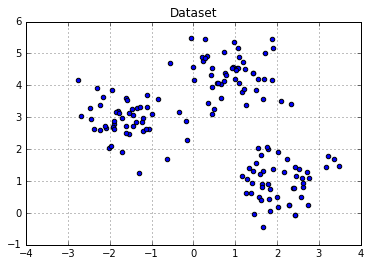

In [59]:
X1, y1 = make_blobs(n_samples=150,
                    n_features=2,  centers=3, cluster_std=0.6, shuffle=True,  random_state=0)

plt.plot()
#plt.xlim([-3, 4])
#plt.ylim([-1, 6])
plt.title('Dataset')
plt.scatter(X1[:,0], X1[:,1], marker = "o")
plt.grid()
plt.show()

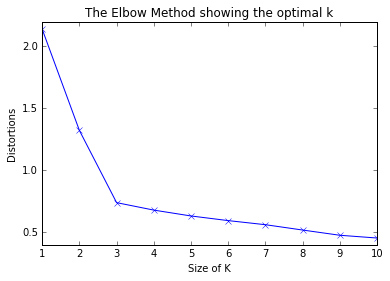

In [61]:
elbow(10, X1)

In [62]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X1)

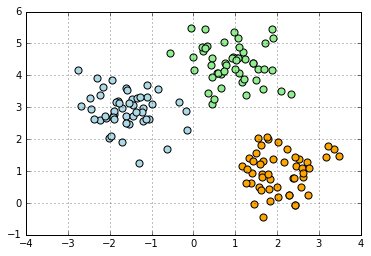

In [67]:
plt.scatter(X1[y_km==0,0],
             X1[y_km ==0,1],
             s=50,
             c='lightgreen',
             marker='o',
            label='cluster 1')
plt.scatter(X1[y_km ==1,0],
            X1[y_km ==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X1[y_km ==2,0],
            X1[y_km ==2,1],
            s=50,
            c='lightblue',
            marker='o',
            label='cluster 3')
'''plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')'''
#plt.legend()
plt.grid()
plt.show()

In [70]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
def silhouette(range_n_clusters, X):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
        
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)


        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.54751572494915746)


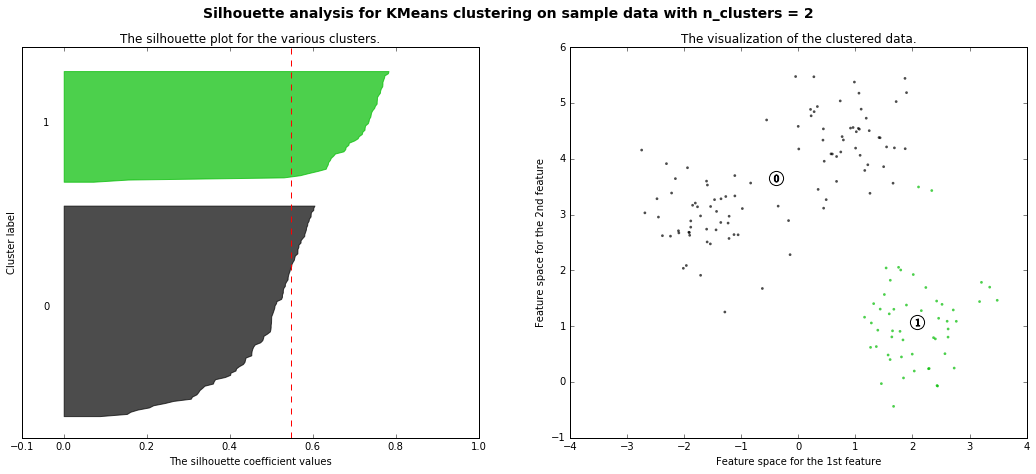

('For n_clusters =', 3, 'The average silhouette_score is :', 0.65674412094960166)


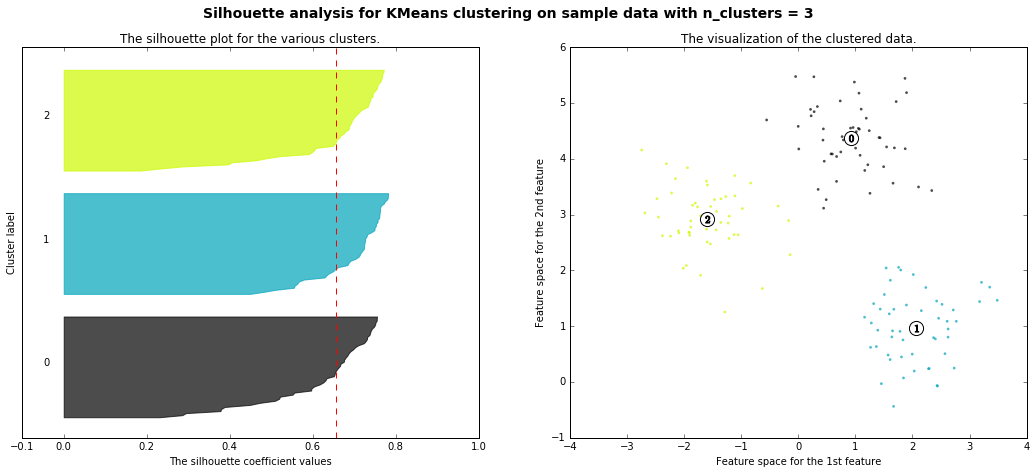

('For n_clusters =', 4, 'The average silhouette_score is :', 0.5307763816936959)


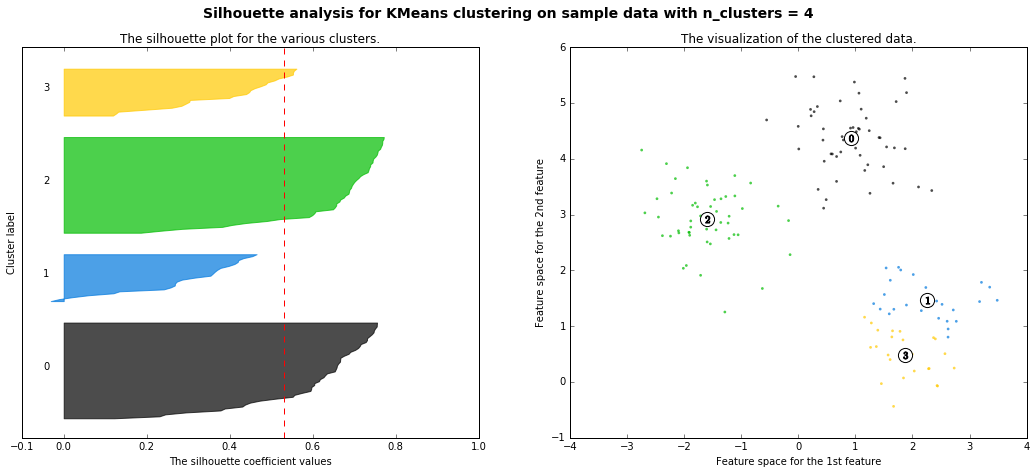

('For n_clusters =', 5, 'The average silhouette_score is :', 0.42796860885179361)


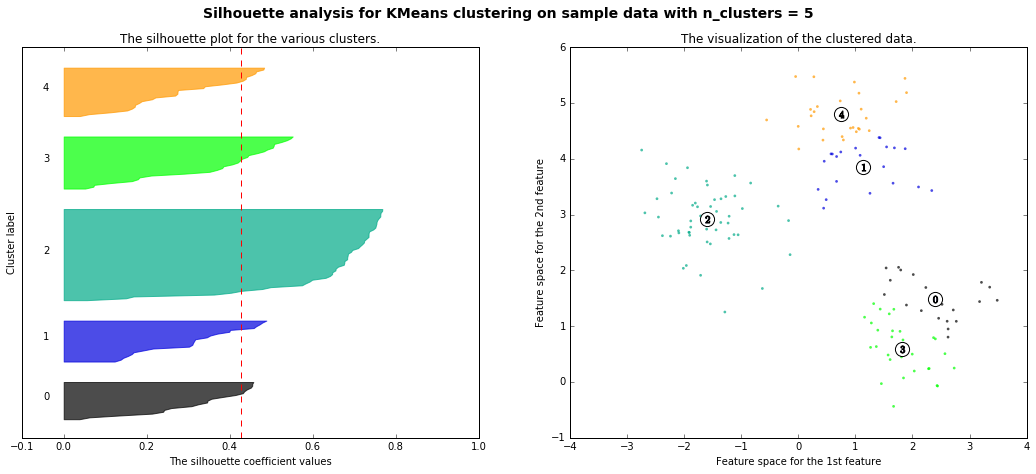

('For n_clusters =', 6, 'The average silhouette_score is :', 0.3139472407069947)


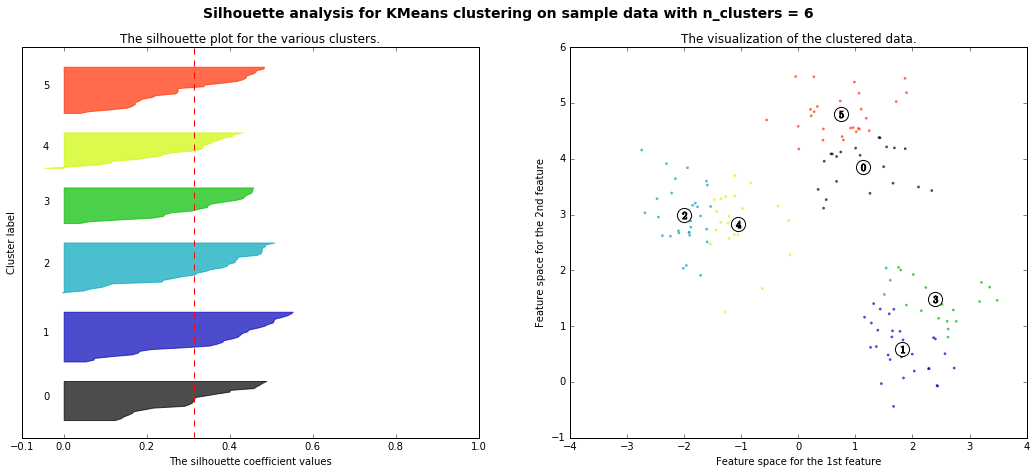

In [71]:
silhouette(range_n_clusters, X1)

# Banana shape data

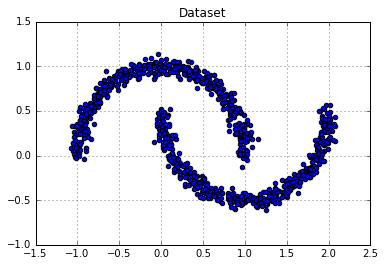

In [84]:
X2, y2 = datasets.make_moons(n_samples=1000, noise=.05,  shuffle=True,  random_state=0)
'''
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
'''

plt.plot()
#plt.xlim([-3, 4])
#plt.ylim([-1, 6])
plt.title('Dataset')
plt.scatter(X2[:,0], X2[:,1], marker = "o")
plt.grid()
plt.show()

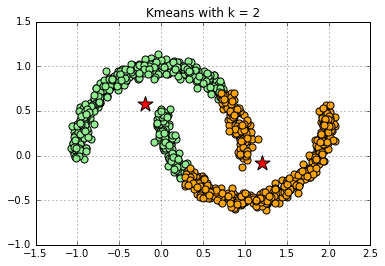

In [91]:
km2 = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km2 = km2.fit_predict(X2)

plt.scatter(X2[y_km2==0,0],
             X2[y_km2 ==0,1],
             s=50,
             c='lightgreen',
             marker='o',
            label='cluster 1')
plt.scatter(X2[y_km2 ==1,0],
            X2[y_km2 ==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(km2.cluster_centers_[:,0],
            km2.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
#plt.legend()
plt.title("Kmeans with k = 2")
plt.grid()
plt.show()

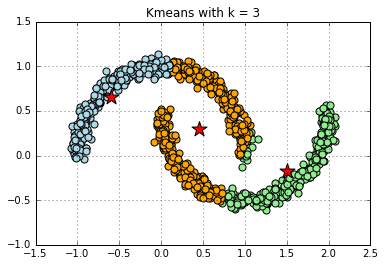

In [93]:
km3 = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km3 = km3.fit_predict(X2)

plt.scatter(X2[y_km3==0,0],
             X2[y_km3 ==0,1],
             s=50,
             c='lightgreen',
             marker='o',
            label='cluster 1')
plt.scatter(X2[y_km3 ==1,0],
            X2[y_km3 ==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X2[y_km3 ==2,0],
            X2[y_km3 ==2,1],
            s=50,
            c='lightblue',
            marker='o',
            label='cluster 3')
plt.scatter(km3.cluster_centers_[:,0],
            km3.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
#plt.legend()
plt.title("Kmeans with k = 3")
plt.grid()
plt.show()

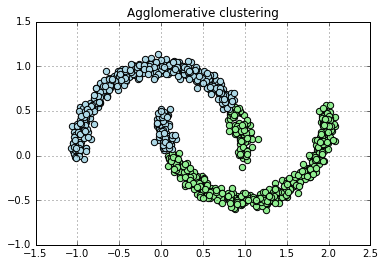

In [97]:

ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X2)
plt.scatter(X2[y_ac==0,0],
            X2[y_ac==0,1],
            c='lightgreen',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X2[y_ac==1,0],
            X2[y_ac==1,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 2')
plt.title('Agglomerative clustering')
#plt.legend()
plt.grid()
plt.show()

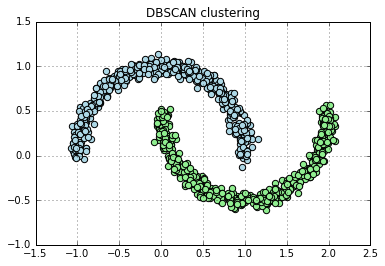

In [98]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X2)
plt.scatter(X2[y_db==0,0],
            X2[y_db==0,1],
            c='lightgreen',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X2[y_db==1,0],
            X2[y_db==1,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 2')
plt.title('DBSCAN clustering')
#plt.legend()
plt.grid()
plt.show()